<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/mAIstros_Intro_to_Neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



##Simple Logistic Regression

In [2]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])
Ccmap_light = ListedColormap(["#FFBBBB", "#BBBBFF"])

In [3]:
def sigmoid(h):
  return 1/(1 + np.exp(-h))


def binary_crossentropy(y, p_hat):
  return -(1/len(y)) * np.sum(y*np.log(p_hat) + (1-y)*np.log(1-p_hat))


def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [4]:
from ast import Return
class simpleLogisticRegression():

  def __init__(self, thresh = 0.5):
    self.thresh = thresh
    self.b = None
    self.w = None

  def fit(self, X, y , eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape
    #Initialize the weights and biases
    self.w = np.random.randn(D)
    self.b = np.random.randn(1)

    J = np.zeros(epochs)
    #SDG optimization
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = binary_crossentropy(y,p_hat)
      #weights and biases update rules
      self.w -= eta*(1/N)*X.T@(p_hat - y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
      return sigmoid(X@self.w + self.b)

  def predict(self , X):
      return (self.__forward__(X) >= self.thresh).astype(np.int32)




In [5]:
def main():

  N = 1000
  D = 2


  X0 = np.random.randn((N//2),D) + np.array([1,1])
  X1 = np.random.randn((N//2), D) + np.array([-1,-1])
  X = np.vstack((X0,X1))


  y = np.array([0] * (N//2) + [1]* (N//2))

  plt.figure()
  plt.scatter(X[:,0], X[:,1] , c=y , s=5 , alpha=0.5)
  plt.show()

  log_reg = simpleLogisticRegression()
  log_reg.fit(X,y , epochs = 5e5, eta = 1e-4 , show_curve= True)
  y_hat = log_reg.predict(X)


  x1 = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 1000)
  x2 = -(log_reg.b/log_reg.w[1]) - (log_reg.w[0]/log_reg.w[1]) * x1


  plt.figure()
  plt.scatter(X[:,0], X[:,1], c=y_hat , alpha = 0.5)
  plt.plot(x1,x2, color = "#000000" , linewidth = 2)
  plt.show()


  xx1, xx2 = np.meshgrid(x1, x1)
  Z = log_reg.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap = Ccmap_light)
  plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()





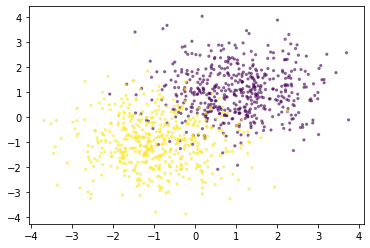

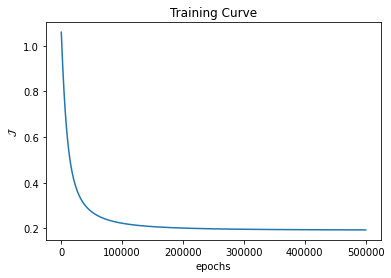

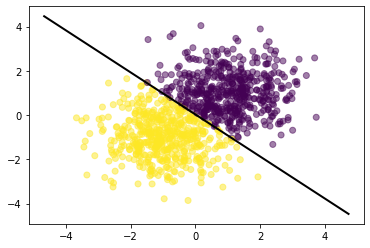

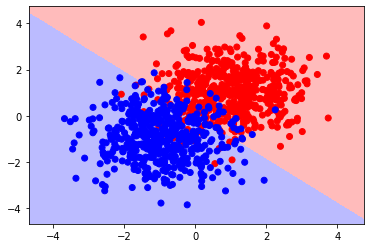

In [6]:
if __name__ == "__main__":
  main()

In [7]:
# Leos update  'epochs=1e4, eta=1e-2'

### Mult - Variate Logistic regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis = 1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis = 0)

def indices_to_one_hot(data, nb_Classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_Classes)[targets]

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [10]:
class MVLogisticRegressioin():

  def fit(self, X, y, eta= 1e-3 , epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape

    #we need to understand what our classes are 
    K = len(np.unique(y))

    y_values = np.unique(y, return_index = False)
    Y = indices_to_one_hot(y, K).astype(int)

    #Initialize W,B
    self.B = np.random.randn(N,K)
    self.W = np.random.randn(D,K)


    J = np.zeros(epochs)

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y, P_hat)
      #weights and Bias update rules

      self.W -= eta*(1/N)*X.T@(P_hat- Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y , axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    return softmax(X@self.W+ self.B)


  def predict(self ,  X): #for nlp probability is the best way to go
    return np.argmax(self.__forward__(X), axis=1)




##3 /22

In [11]:
data1 = pd.read_csv("/content/drive/MyDrive/DA/TripGaussKNN.csv")

In [12]:
data1

,Unnamed: 0,0,1,2
0,0,2.769395,0.762216,0
1,1,1.519271,1.487948,0
2,2,2.407084,2.836605,0
3,3,1.276534,1.396749,0
4,4,0.380165,4.396517,0
...,...,...,...,...
2995,2995,-3.537007,3.431588,2
2996,2996,-1.709969,2.675040,2
2997,2997,-2.098664,2.084230,2
2998,2998,-1.523310,1.083698,2


In [13]:
y = data1['2'].to_numpy()
X = data1[['0','1']].to_numpy()

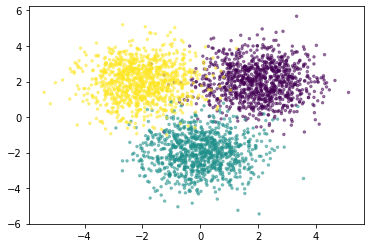

In [14]:
plt.figure()
plt.scatter(X[:,0], X[:,1] , c=y , alpha=0.5 , s=6)

In [15]:
multlogreg = MVLogisticRegressioin()

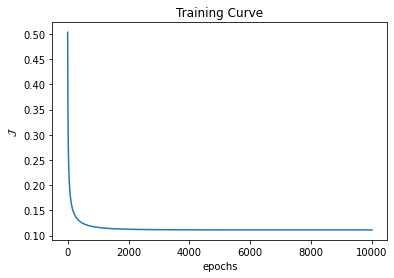

In [16]:
multlogreg.fit(X,y,epochs=1e4,eta=1e-1, show_curve=True) #eta is learnig rate

In [17]:
y_hat = multlogreg.predict(X)

In [18]:
accuracy(y, y_hat)

0.9593333333333334

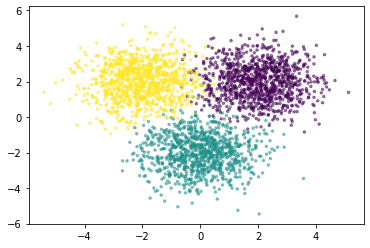

In [19]:
plt.figure()
plt.scatter(X[:,0], X[:,1] , c=y_hat , alpha=0.5 , s=6)

## Shallow ANN or Multi-layer perceptron

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
cmap_light = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [43]:
'''
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1 + np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis = 1, keepdims = True)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]] = 1

    return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def cross_entropy(Y, P_hat):
  return -np.sum(Y*np.log(P_hat))
'''

#activation function
def linear(H):
  return H

#activation function ReLU, return linear for positive and zero for negative values
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1 / (1 + np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH / eH.sum(axis=1, keepdims=True)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N, K))

  for i in range(N):
    Y[i, y[i]]=1

  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat) 

def cross_entropy(Y, P_hat):
  return -np.sum(Y * np.log(P_hat))

In [44]:
'''
class shallow_ANN():

  def fit(self, X, y, neurons = 10, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    Y = one_hot_encode(y)
    N,D = X.shape
    K = Y.shape[1]
    # weights and Biases Initialization
    self.W ={l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons], [neurons,K]),1)} #l for layer , using dict comprehension 
    self.B = {l: np.random.randn(M) for l,M in enumerate((neurons,K),1)}


    #define activations
    self.a = {1:np.tanh, 2:softmax }


    J = np.zeros(epochs)


    #Gradient Descent ( optimizing )

    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])


      #Weights and Biases update rules
      #For layer 2 (output)

      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis = 0)

      #For layer 1
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*(self.Z[2] - Y)@self.W[2].T*(1-self.Z[1]**2).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()


  def __forward__(self, X):
    self.Z = {0:X}

    for l in sorted(self.W.keys()):
      self.Z[1]= self.a[1](self.Z[l-1]@ self.W[l] + self.B[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis = 1)
'''


'\nclass shallow_ANN():\n\n  def fit(self, X, y, neurons = 10, eta = 1e-3, epochs = 1e3, show_curve = False):\n    epochs = int(epochs)\n    Y = one_hot_encode(y)\n    N,D = X.shape\n    K = Y.shape[1]\n    # weights and Biases Initialization\n    self.W ={l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons], [neurons,K]),1)} #l for layer , using dict comprehension \n    self.B = {l: np.random.randn(M) for l,M in enumerate((neurons,K),1)}\n\n\n    #define activations\n    self.a = {1:np.tanh, 2:softmax }\n\n\n    J = np.zeros(epochs)\n\n\n    #Gradient Descent ( optimizing )\n\n    for epoch in range(epochs):\n      self.__forward__(X)\n      J[epoch] = cross_entropy(Y, self.Z[2])\n\n\n      #Weights and Biases update rules\n      #For layer 2 (output)\n\n      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-y)\n      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis = 0)\n\n      #For layer 1\n      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))\n     

In [45]:
class Shallow_ANN():

  def fit(self, X, Y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(Y)
    N, D = X.shape
    K = Y.shape[1]
    # Weights and Bias initialization
    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D,neurons], [neurons,K]), 1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
    #define activations
    self.a = {1: np.tanh, 2: softmax}

    J = np.zeros(epochs)
    # GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])

      #Weights and Biases update rules
      #for layer 2 (Output)
      self.W[2] -= eta * (1 / N) * self.Z[1].T @ (self.Z[2] - Y)
      self.B[2] -= eta * (1 / N) * (self.Z[2] - Y).sum(axis=0)
      # For layer 1
      self.W[1] -= eta * (1 / N) * X.T @ ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2))
      self.B[1] -= eta * (1 / N) * ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z = {0: X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1] @ self.W[l] + self.B[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [46]:
def main():
  D =2
  K = 3
  N= int(K*1e3)

  X0= np.random.randn((N//K),D) + np.array([2,2])
  X1= np.random.randn((N//K),D) + np.array([0,-2])
  X2= np.random.randn((N//K),D) + np.array([-2,2])
  X=np.vstack((X0,X1,X2))

  y=np.array([0]*(N//K)+ [1]*(N//K)+ [2]*(N//K))

  my_ann = Shallow_ANN()

  my_ann.fit(X,y, neurons=100, eta = 1e-2, epochs=7e2, show_curve=True)
  y_hat =my_ann.predict(X)

  print (f"Training Accuracy: {accuracy(y,y_hat):0.4f}")

  #print(my_ann.W)
  #print(my_ann.B)
  x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
  x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)
  
  xx1, xx2 = np.meshgrid(x1, x2)
  Z = my_ann.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
  
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
  
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

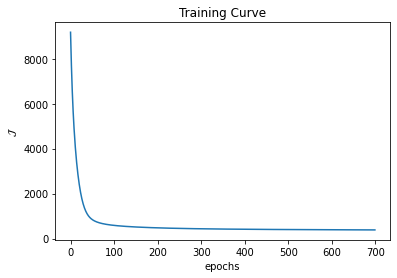

Training Accuracy: 0.9667


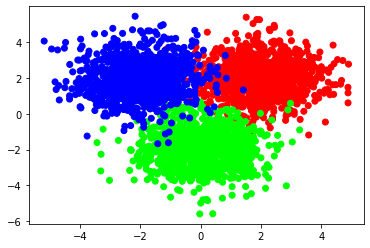

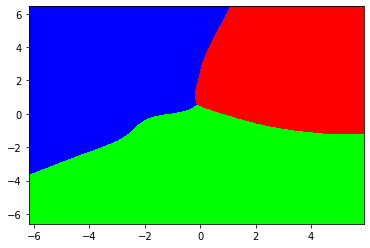

In [47]:
if __name__ == "__main__":
  main()

In [48]:
enumerate(zip([4,6],[6,3]),1)

## Variable Architecture Neural Net with Back Propagation


```
# This is formatted as code
```



In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [106]:
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB","#BBBBFF"])

In [107]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))



def softmax(H):
  eH = np.exp(H)
  return eH / eH.sum(axis=1, keepdims=True)
  #Loss Function

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y,Y_hat):
  return(1/(2*len(Y))) * np.sum(Y-Y_hat)


def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]] = 1

  return Y

#Metrics

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

In [108]:
#Derivatives of each of these functions

def dervative(Z,a):
  
  if a==linear:
    return 1

  elif a==sigmoid:
    return Z*(1-Z)

  elif a==np.tanh:
    return 1-Z*Z

  elif a==ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("Unknown Activation Function") 

In [109]:
class ANN():

  def __init__(self, architecture , activations = None, mode=0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1 #Location of output later
    
  def fit(self, X, y , eta = 1e-3 , epochs = 1e4 , show_curve = False ):

    epochs = int(epochs)
    if self.mode:
      Y = y
    else:
      Y = one_hot_encode(y)


    N,D = X.shape
    K = Y.shape[1]

    #Initialize weights and biases 
    self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip(([D] + self.architecture),(self.architecture + [K])),1)}
    self.B = {l: np.random.randn(M) for l,M in enumerate(self.architecture+[K],1)}

    if self.activations is None:
      self.a = {l : ReLU for l in range(1, self.L)}
    else:
      self.a = {l:  act for l, act in enumerate(self.activations, 1)}


    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L]= softmax # if binary classification it should be sigmoid 

    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch] == OLS(Y, self.Z[self.L])
      else:
        J[epoch] =  cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted(self.W.keys(), reverse = True):
        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.B[l] -= eta*dB

        if l>1:
          dZ = dH@self.W[l].T
          dH = dZ*dervative(self.Z[l-1], self.a[l-1])

      
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()

  def __forward__(self,X):
    self.Z = {0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)


In [110]:
def main_class():
  D =2
  K = 3
  N= int(K*1e3)

  X0= np.random.randn((N//K),D) + np.array([2,2])
  X1= np.random.randn((N//K),D) + np.array([0,-2])
  X2= np.random.randn((N//K),D) + np.array([-2,2])
  X=np.vstack((X0,X1,X2))

  y=np.array([0]*(N//K)+ [1]*(N//K)+ [2]*(N//K))

  #Define network

  ann = ANN([5,4],[np.tanh, ReLU])
  ann.fit(X,y,epochs=1e4,eta=5e-3, show_curve=True)
  y_hat = ann.predict(X)
  print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")
    
  x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
  x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)
    
  xx1, xx2 = np.meshgrid(x1, x2)
  Z = ann.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
  plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,alpha=0.2)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

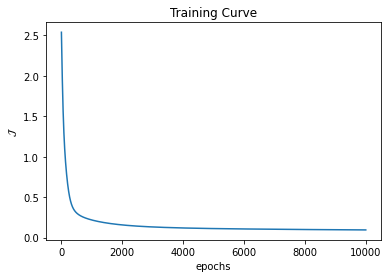

Training Accuracy: 0.9663


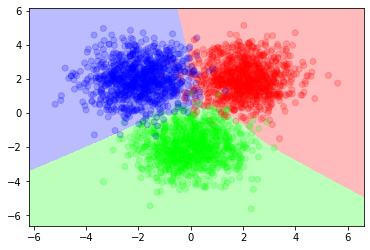

In [112]:
if __name__ == "__main__":
  main_class()

In [115]:
# we have done the classification part , now we do the regression

def main_reg():

  N= 200

  X = np.linspace(0,15,N).reshape(N,1)
  y = 3.0989 + 7.9373*np.sqrt(X) + 7.198*np.exp(-0.2*(X-7)**2)\
      - 11.93745*np.exp(-1.5*(X-11)**2)+np.random.randn(N,1)*0.7

  my_ann = ANN(mode = 1, architecture = [8,8,8], activations = [np.tanh]*3)
  my_ann.fit(X,y,eta = 5e-4, epochs = 2e5,show_curve = True)
  y_hat = my_ann.predict(X)

  plt.figure()
  plt.scatter(X,y, s=5)
  plt.plot(X, y_hat, color = "#000000" , linewidth = 1.5)
  print(f"Rsquared:{R2(y, y_hat):0.4f}")

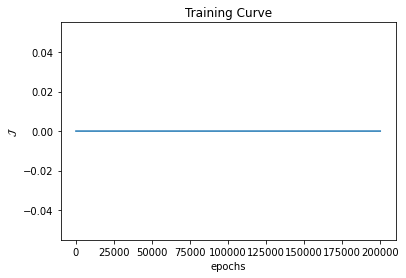

Rsquared:0.9922


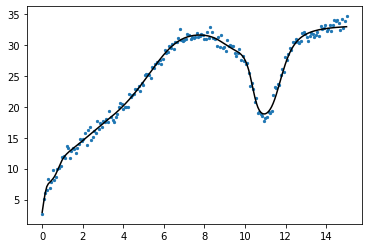

In [116]:
if __name__ == "__main__":
  main_reg()